In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [3]:
def prepare_data(data):
  # replace categoric and ordinal attributes with numeric values
  # income
  data["income"].replace({" <=50K": 0, " >50K": 1}, inplace=True)
  # race
  data["race"].replace(
  {
      " White": 0,
      " Black": 1,
      " Asian-Pac-Islander": 2,
      " Amer-Indian-Eskimo": 3,
      " Other": 4,
  },
  inplace=True,
  )
  # sex
  data["sex"].replace({" Male": 0, " Female": 1}, inplace=True)
  # data["relationship"].replace({' Own-child': 0, ' Husband': 1, ' Not-in-family': 2, ' Other-relative': 3, ' Unmarried': 4, ' Wife': 5}, inplace=True)



In [4]:

def gen_out(data, col):
    data.boxplot(col)


In [5]:
# read data
data = pd.read_excel("../data/Census-Datensatz.xlsx")
print(data.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [6]:
# retrieve unique values for attributes
i = set(data["race"])
print("Set i(race): ", i)

#i = set(data["occupation"])
#print("Set i(occupation): ", i)

#i = set(data["relationship"])
#print("Set i(relationship): ", i)

#i = set(data["marital-status"])
#print("Set i(marital-status): ", i)


Set i(race):  {' Other', ' Amer-Indian-Eskimo', ' White', ' Black', ' Asian-Pac-Islander'}


In [7]:
# Pop the columns:

to_drop = [
    "occupation",
    "native-country",
    "education",
    "workclass",
    "relationship",
    "marital-status",
]
data.drop(to_drop, axis=1, inplace=True)


In [8]:
# replace non-numeric values with numeric values
prepare_data(data)
print(data.head())


   age  fnlwgt  education-num  race  sex  capital-gain  capital-loss  \
0   39   77516             13     0    0          2174             0   
1   50   83311             13     0    0             0             0   
2   38  215646              9     0    0             0             0   
3   53  234721              7     1    0             0             0   
4   28  338409             13     1    1             0             0   

   hours-per-week  income  
0              40       0  
1              13       0  
2              40       0  
3              40       0  
4              40       0  


In [9]:
# show correlations between all fields
data.corr()


,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076646,0.036527,-0.040000,-0.088832,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000500,-0.026858,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,-0.039760,-0.012280,0.122630,0.079923,0.148123,0.335154
race,-0.040000,0.000500,-0.039760,1.000000,0.067840,-0.007991,-0.017190,-0.033115,-0.067713
sex,-0.088832,-0.026858,-0.012280,0.067840,1.000000,-0.048480,-0.045567,-0.229309,-0.215980
capital-gain,0.077674,0.000432,0.122630,-0.007991,-0.048480,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.017190,-0.045567,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,-0.033115,-0.229309,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,-0.067713,-0.215980,0.223329,0.150526,0.229689,1.000000


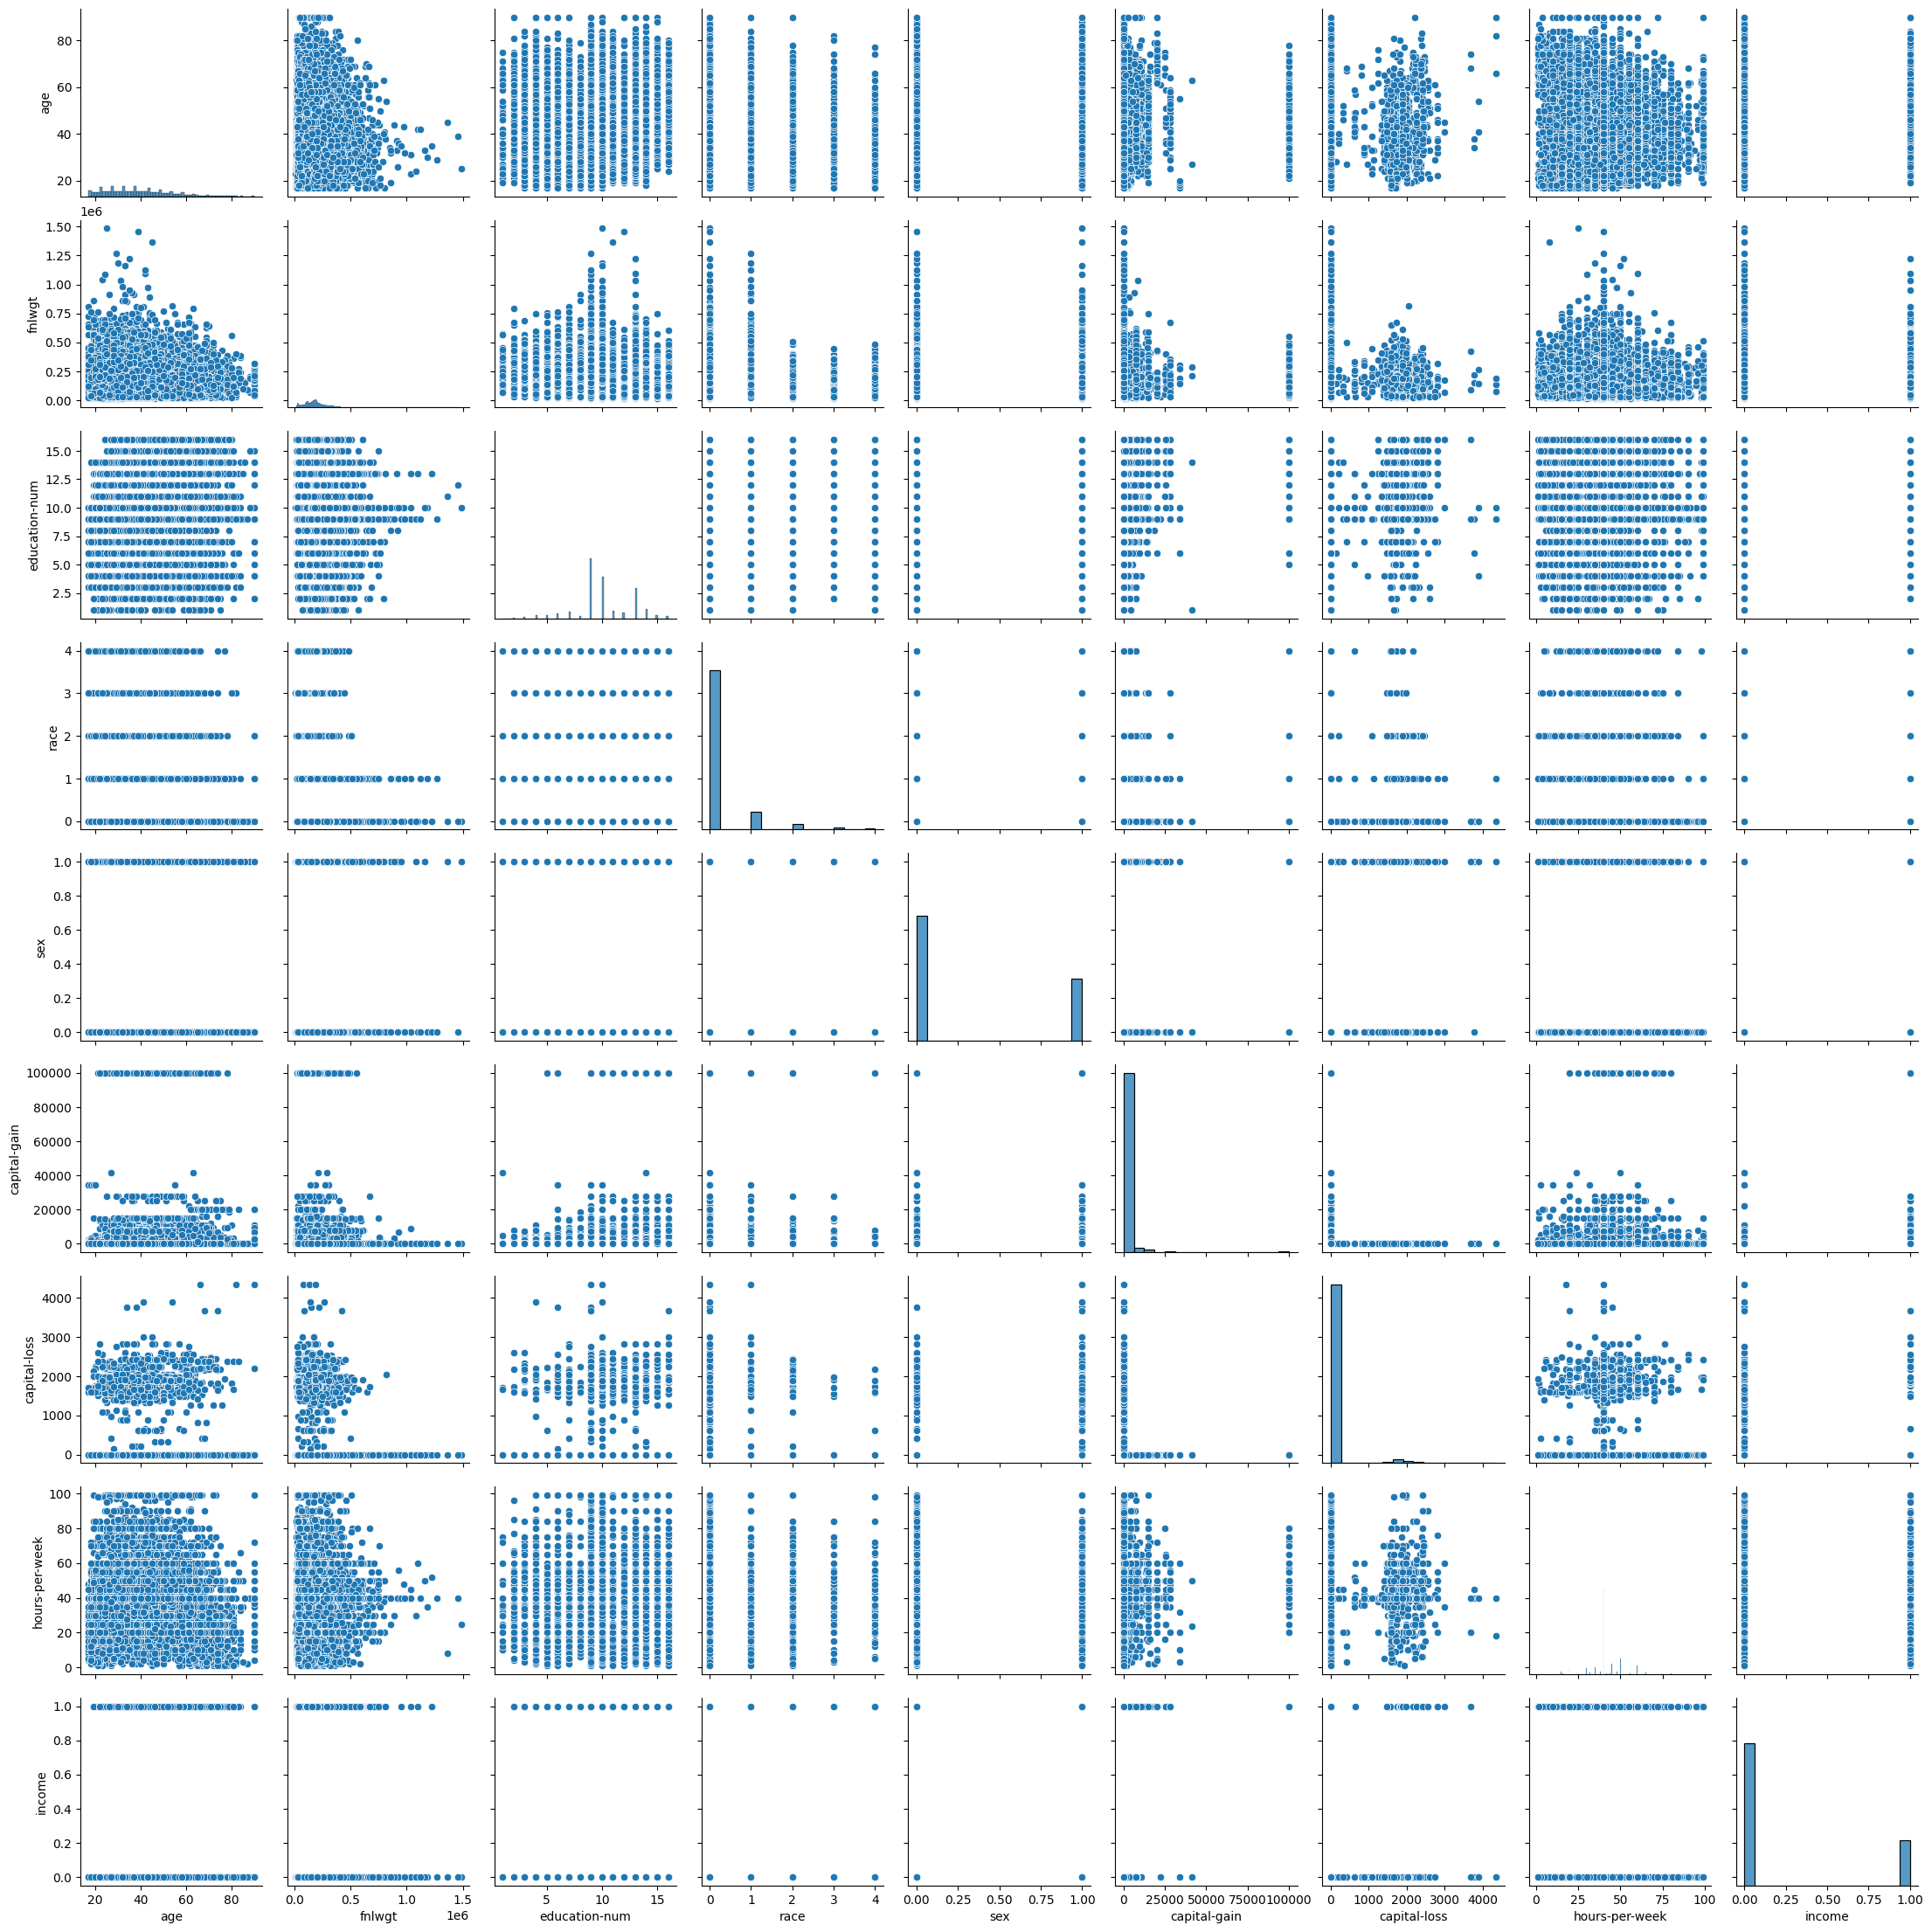

In [10]:
# Plot Streudiagramm (scatter matrix)
#pd.plotting.scatter_matrix(data, figsize=(20, 20))

# now, with matplotlib
#fig, axes = plt.subplots(1, 1)
sns.pairplot(data)


**This diagram is not really readable! Maybe, there are formatting parameters that would help...**

sorted Data education-num: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
idx: 16 bins


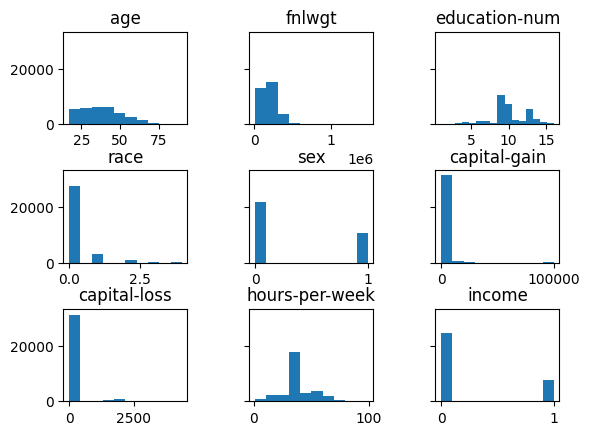

In [26]:
# plot histograms for all fields, set figure size (otherwise unusable)
# data.hist(figsize=(20, 20))

from itertools import count


fig, axes = plt.subplots(3, 3, sharey=True)  # further params: sharex, sharey

i = 0
for idx in data.columns:
    ibins = None
    ax = axes[i // 3, i % 3]
    if idx == "education-num":
        sortedVals = np.sort(data[idx].unique())
        print("sorted Data education-num:", sortedVals)
        ibins = len(sortedVals)
        print("idx: {} bins".format(ibins))
        # !TBD! replace numeric value by education
    ax.hist(data[idx], bins=ibins)
    ax.set_title(idx)
    i = i + 1
plt.subplots_adjust(hspace=0.5, wspace=0.5)


**Interpretation**
**SEX** 
Deutlich mehr Männer als Frauen!
Vermutlich nicht repräsentativ


In [ ]:
# data.plot(kind="box", logy=True, figsize=(10,10), subplots=True)
# data.plot(kind="box", logy=True, layout=(3, 2))
for idx in data.columns:
    # data.plot.box(x=idx, title=idx)
    data.boxplot(idx)


**Interpretation**
Too many "ausreißer"!?
-> data somehow not good enough? **

In [ ]:
data.boxplot("fnlwgt")



**Interpretation:**
Extrem viele Ausreißer


In [ ]:
data.boxplot("education-num")


**Interpretation:**
Leicht verschoben, mehr mit hoher Ausbildung

In [ ]:
data.boxplot("sex")


In [ ]:
data.boxplot("capital-gain")


In [ ]:
data.boxplot("capital-loss")


In [ ]:
data.boxplot("hours-per-week")



In [ ]:
data.boxplot("income")


In [ ]:
#Yet another try to display diagrams with just a few statements
print(data.columns)
idx_lst = []
for i in data.columns:
    idx_lst.append(i)
#   gen_out(data, i)

print("Input f. data.boxplot", idx_lst)
data.boxplot(idx_lst)
